# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [183]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings 
import pandas as pd
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
import random

In [184]:
url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [185]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [186]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10). Un falso negativo me cuesta 10 veces mas que 1 falso positivo. En fraude es mas valioso.

F1 debe dar cerquita a 0

Comment about the results

In [187]:
# accuracy mas o menos 99.935%
print(df.dtypes)
df.shape

accountAge                                        int64
digitalItemCount                                  int64
sumPurchaseCount1Day                              int64
sumPurchaseAmount1Day                           float64
sumPurchaseAmount30Day                          float64
paymentBillingPostalCode - LogOddsForClass_0    float64
accountPostalCode - LogOddsForClass_0           float64
paymentBillingState - LogOddsForClass_0         float64
accountState - LogOddsForClass_0                float64
paymentInstrumentAgeInAccount                   float64
ipState - LogOddsForClass_0                     float64
transactionAmount                               float64
transactionAmountUSD                            float64
ipPostalCode - LogOddsForClass_0                float64
localHour - LogOddsForClass_0                   float64
Label                                             int64
dtype: object


(138721, 16)

In [188]:
y=df.Label
x=df.iloc[:,0:(df.shape[1]-1)]

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.3, random_state=42)
logreg = LogisticRegression(solver='sag',max_iter =150) #cambio en parametros para lograr convergencia.
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('ACCURACY: ',round(metrics.accuracy_score(Y_test, y_pred),3)) #ACCURACY
print('F1_SCORE: ',round(metrics.f1_score(Y_test, y_pred),3)) #F1-SCORE
print('F_BETA_SCORE: ',round(metrics.fbeta_score(Y_test, y_pred, beta=10),3)) #F_BETA-SCORE

ACCURACY:  0.994
F1_SCORE:  0.0
F_BETA_SCORE:  0.0


In [190]:
treereg = DecisionTreeClassifier(max_depth=19, random_state=1)
treereg.fit(X_train, Y_train)
y_pred=treereg.predict(X_test)
print('ACCURACY: ',round(metrics.accuracy_score(Y_test, y_pred),3)) #ACCURACY
print('F1_SCORE: ',round(metrics.f1_score(Y_test, y_pred),3)) #F1-SCORE
print('F_BETA_SCORE: ',round(metrics.fbeta_score(Y_test, y_pred, beta=10),3)) #F_BETA-SCORE

ACCURACY:  0.991
F1_SCORE:  0.166
F_BETA_SCORE:  0.147


In [191]:
clf = RandomForestClassifier(n_estimators=300, random_state=1, n_jobs=-1,max_features=15)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
print('ACCURACY: ',round(metrics.accuracy_score(Y_test, y_pred),3)) #ACCURACY
print('F1_SCORE: ',round(metrics.f1_score(Y_test, y_pred),3)) #F1-SCORE
print('F_BETA_SCORE: ',round(metrics.fbeta_score(Y_test, y_pred, beta=10),3)) #F_BETA-SCORE

ACCURACY:  0.994
F1_SCORE:  0.139
F_BETA_SCORE:  0.082


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [192]:
salid=[]

In [193]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

In [194]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

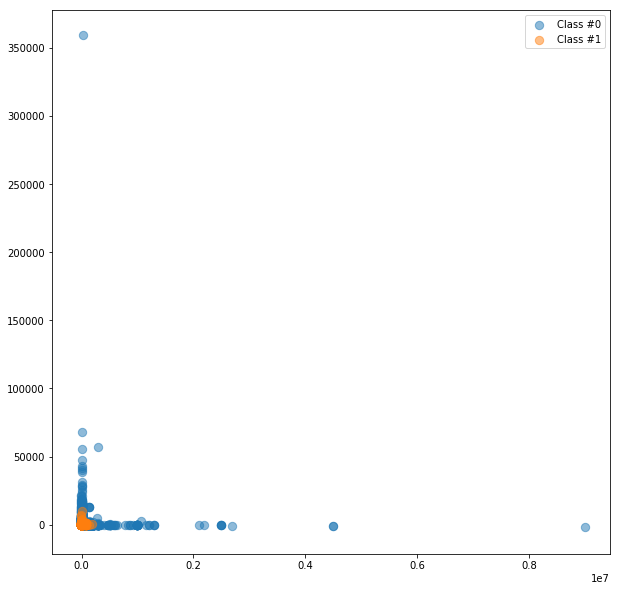

In [195]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)
pca = PCA(n_components = 2)
X_train_a = X_train
X_train_a = pca.fit_transform(X_train_a)
plot_two_classes(X_train_a, y_train)

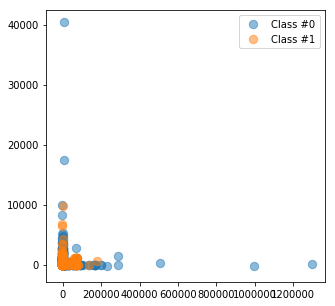

Random Forest Target percentage:  0.1 Media:  0.1 Tamaño:  5497
Accuracy:  0.982
F1_Score :  0.18
F_BETA-SCORE:  0.333
DecisionTree Target percentage:  0.1 Media:  0.1 Tamaño:  5497
Accuracy:  0.936
F1_Score :  0.061
F_BETA-SCORE:  0.324
Logistic:  0.1 Media:  0.1 Tamaño:  5497
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


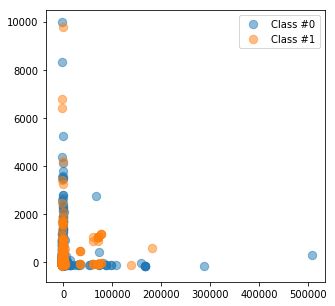

Random Forest Target percentage:  0.2 Media:  0.2 Tamaño:  2755
Accuracy:  0.95
F1_Score :  0.099
F_BETA-SCORE:  0.433
DecisionTree Target percentage:  0.2 Media:  0.2 Tamaño:  2755
Accuracy:  0.875
F1_Score :  0.044
F_BETA-SCORE:  0.408
Logistic:  0.2 Media:  0.2 Tamaño:  2755
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


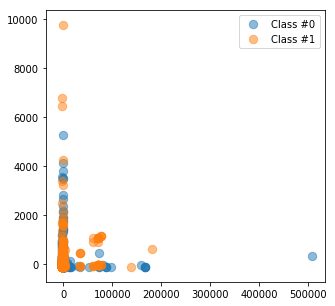

Random Forest Target percentage:  0.3 Media:  0.308 Tamaño:  1790
Accuracy:  0.89
F1_Score :  0.058
F_BETA-SCORE:  0.489
DecisionTree Target percentage:  0.3 Media:  0.308 Tamaño:  1790
Accuracy:  0.816
F1_Score :  0.035
F_BETA-SCORE:  0.433
Logistic:  0.3 Media:  0.308 Tamaño:  1790
Accuracy:  0.964
F1_Score :  0.021
F_BETA-SCORE:  0.063


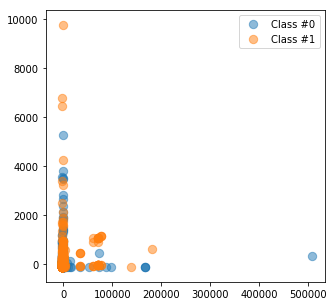

Random Forest Target percentage:  0.4 Media:  0.414 Tamaño:  1333
Accuracy:  0.827
F1_Score :  0.042
F_BETA-SCORE:  0.503
DecisionTree Target percentage:  0.4 Media:  0.414 Tamaño:  1333
Accuracy:  0.753
F1_Score :  0.027
F_BETA-SCORE:  0.415
Logistic:  0.4 Media:  0.414 Tamaño:  1333
Accuracy:  0.37
F1_Score :  0.017
F_BETA-SCORE:  0.446


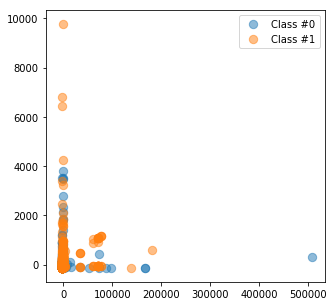

Random Forest Target percentage:  0.5 Media:  0.512 Tamaño:  1079
Accuracy:  0.756
F1_Score :  0.033
F_BETA-SCORE:  0.509
DecisionTree Target percentage:  0.5 Media:  0.512 Tamaño:  1079
Accuracy:  0.671
F1_Score :  0.023
F_BETA-SCORE:  0.42
Logistic:  0.5 Media:  0.512 Tamaño:  1079
Accuracy:  0.32
F1_Score :  0.016
F_BETA-SCORE:  0.432


In [196]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u_a, y_u_a = UnderSampling(X_train_a, y_train, target_percentage, 1)
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    plot_two_classes(X_u_a, y_u_a, size=(5, 5))
    plt.show() 
    rfc = RandomForestClassifier(n_estimators=300,max_features=15 , random_state=1, n_jobs=-1)
    treeclf = DecisionTreeClassifier(max_depth=19, random_state=1)
    logreg = LogisticRegression(solver='sag',max_iter =150) #cambio en parametros para lograr convergencia.
    treeclf.fit(X_u, y_u)
    rfc.fit(X_u, y_u)
    logreg.fit(X_u, y_u)
    y_pred=rfc.predict(X_test)
    y_pred_a = treeclf.predict(X_test)
    y_pred_b = logreg.predict(X_test)
    salid.append(['UnderSampling','Random Forest',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred),3)])
    salid.append(['UnderSampling','Random Forest',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred),3)])
    salid.append(['UnderSampling','Random Forest',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred),3)])
    salid.append(['UnderSampling','DecisionTree',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred_a),3)])
    salid.append(['UnderSampling','DecisionTree',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred_a),3)])
    salid.append(['UnderSampling','DecisionTree',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_a),3)])
    salid.append(['UnderSampling','Logistic',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred_b),3)])
    salid.append(['UnderSampling','Logistic',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred_b),3)])
    salid.append(['UnderSampling','Logistic',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_b),3)])
    print('Random Forest Target percentage: ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
    print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred),3)) #ACCURACY
    print('F1_Score : ',round(metrics.f1_score(y_test, y_pred),3)) #F1-SCORE
    print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred, beta=10),3)) #F_BETA-SCORE
    print('DecisionTree Target percentage: ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
    print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_a),3)) #ACCURACY
    print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_a),3)) #F1-SCORE
    print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_a, beta=10),3)) #F_BETA-SCORE
    print('Logistic: ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
    print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_b),3)) #ACCURACY
    print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_b),3)) #F1-SCORE
    print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_b, beta=10),3)) #F_BETA-SCORE


# Exercise 15.3

Same analysis using random-over-sampling

In [197]:
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

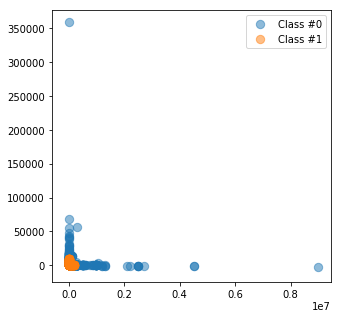

Random Forest Target percentage:  0.1 Media:  0.1 Tamaño:  107280
Accuracy:  0.993
F1_Score :  0.189
F_BETA-SCORE:  0.14
DecisionTree Target percentage:  0.1 Media:  0.1 Tamaño:  107280
Accuracy:  0.986
F1_Score :  0.135
F_BETA-SCORE:  0.186
Logistic:  0.1 Media:  0.1 Tamaño:  107280
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


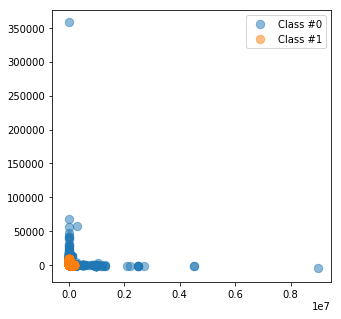

Random Forest Target percentage:  0.2 Media:  0.2 Tamaño:  120690
Accuracy:  0.993
F1_Score :  0.179
F_BETA-SCORE:  0.131
DecisionTree Target percentage:  0.2 Media:  0.2 Tamaño:  120690
Accuracy:  0.982
F1_Score :  0.112
F_BETA-SCORE:  0.193
Logistic:  0.2 Media:  0.2 Tamaño:  120690
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


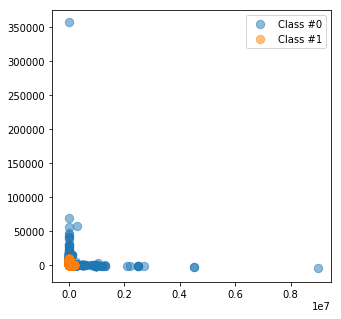

Random Forest Target percentage:  0.3 Media:  0.3 Tamaño:  137931
Accuracy:  0.993
F1_Score :  0.157
F_BETA-SCORE:  0.115
DecisionTree Target percentage:  0.3 Media:  0.3 Tamaño:  137931
Accuracy:  0.967
F1_Score :  0.078
F_BETA-SCORE:  0.228
Logistic:  0.3 Media:  0.3 Tamaño:  137931
Accuracy:  0.98
F1_Score :  0.028
F_BETA-SCORE:  0.048


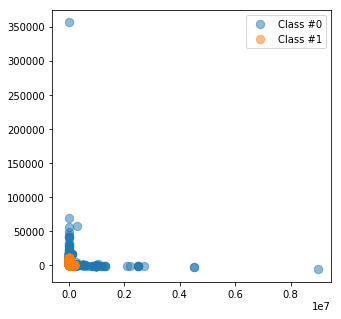

Random Forest Target percentage:  0.4 Media:  0.4 Tamaño:  160920
Accuracy:  0.993
F1_Score :  0.162
F_BETA-SCORE:  0.123
DecisionTree Target percentage:  0.4 Media:  0.4 Tamaño:  160920
Accuracy:  0.97
F1_Score :  0.084
F_BETA-SCORE:  0.229
Logistic:  0.4 Media:  0.4 Tamaño:  160920
Accuracy:  0.39
F1_Score :  0.017
F_BETA-SCORE:  0.454


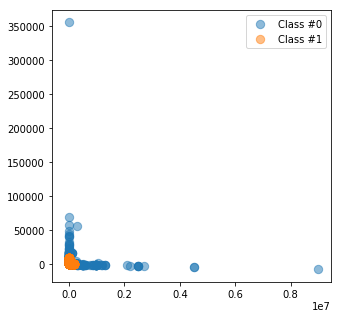

Random Forest Target percentage:  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.992
F1_Score :  0.145
F_BETA-SCORE:  0.111
DecisionTree Target percentage:  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.947
F1_Score :  0.057
F_BETA-SCORE:  0.254
Logistic:  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.324
F1_Score :  0.016
F_BETA-SCORE:  0.434


In [198]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, y_train, target_percentage, 1)
    X_u_a = pca.fit_transform(X_u)
    plot_two_classes(X_u_a, y_u, size=(5, 5))
    plt.show() 
    rfc = RandomForestClassifier(n_estimators=300,max_features=15 , random_state=1, n_jobs=-1)
    treeclf = DecisionTreeClassifier(max_depth=19, random_state=1)
    logreg = LogisticRegression(solver='sag',max_iter =150) #cambio en parametros para lograr convergencia.
    treeclf.fit(X_u, y_u)
    rfc.fit(X_u, y_u)
    logreg.fit(X_u, y_u)
    y_pred=rfc.predict(X_test)
    y_pred_a = treeclf.predict(X_test)
    y_pred_b = logreg.predict(X_test)
    salid.append(['OverSampling','Random Forest',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred),3)])
    salid.append(['OverSampling','Random Forest',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred),3)])
    salid.append(['OverSampling','Random Forest',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred),3)])
    salid.append(['OverSampling','DecisionTree',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred_a),3)])
    salid.append(['OverSampling','DecisionTree',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred_a),3)])
    salid.append(['OverSampling','DecisionTree',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_a),3)])
    salid.append(['OverSampling','Logistic',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred_b),3)])
    salid.append(['OverSampling','Logistic',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred_b),3)])
    salid.append(['OverSampling','Logistic',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_b),3)])
    print('Random Forest Target percentage: ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
    print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred),3)) #ACCURACY
    print('F1_Score : ',round(metrics.f1_score(y_test, y_pred),3)) #F1-SCORE
    print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred, beta=10),3)) #F_BETA-SCORE
    print('DecisionTree Target percentage: ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
    print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_a),3)) #ACCURACY
    print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_a),3)) #F1-SCORE
    print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_a, beta=10),3)) #F_BETA-SCORE
    print('Logistic: ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
    print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_b),3)) #ACCURACY
    print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_b),3)) #F1-SCORE
    print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_b, beta=10),3)) #F_BETA-SCORE

# Exercise 15.4 (3 points)


Evaluate the results using SMOTE

Which parameters did you choose?

In [199]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_train.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [200]:
def SMOTE_(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
 
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_train_a.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

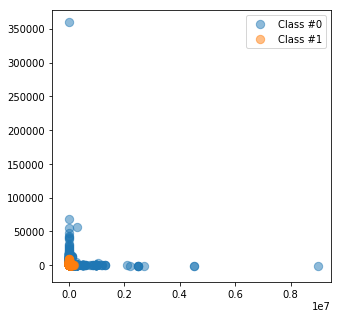

Random Forest  0.1 Media:  0.1 Tamaño:  107280 k:  5
Accuracy:  0.993
F1_Score :  0.141
F_BETA-SCORE:  0.095
Decision Tree  0.1 Media:  0.1 Tamaño:  107280 k:  5
Accuracy:  0.988
F1_Score :  0.09
F_BETA-SCORE:  0.11
Logistic  0.1 Media:  0.1 Tamaño:  107280 k:  5
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


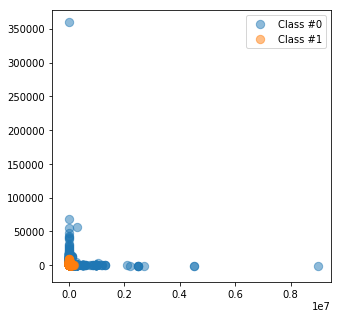

Random Forest  0.1 Media:  0.1 Tamaño:  107280 k:  15
Accuracy:  0.993
F1_Score :  0.169
F_BETA-SCORE:  0.115
Decision Tree  0.1 Media:  0.1 Tamaño:  107280 k:  15
Accuracy:  0.988
F1_Score :  0.13
F_BETA-SCORE:  0.155
Logistic  0.1 Media:  0.1 Tamaño:  107280 k:  15
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


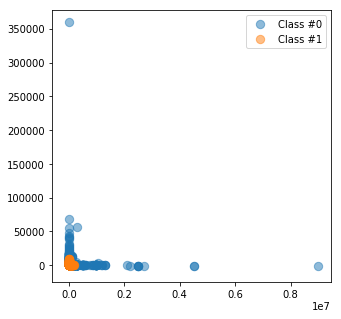

Random Forest  0.2 Media:  0.2 Tamaño:  120690 k:  5
Accuracy:  0.993
F1_Score :  0.152
F_BETA-SCORE:  0.115
Decision Tree  0.2 Media:  0.2 Tamaño:  120690 k:  5
Accuracy:  0.987
F1_Score :  0.1
F_BETA-SCORE:  0.126
Logistic  0.2 Media:  0.2 Tamaño:  120690 k:  5
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


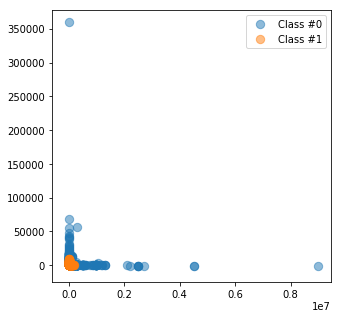

Random Forest  0.2 Media:  0.2 Tamaño:  120690 k:  15
Accuracy:  0.993
F1_Score :  0.172
F_BETA-SCORE:  0.123
Decision Tree  0.2 Media:  0.2 Tamaño:  120690 k:  15
Accuracy:  0.985
F1_Score :  0.1
F_BETA-SCORE:  0.142
Logistic  0.2 Media:  0.2 Tamaño:  120690 k:  15
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


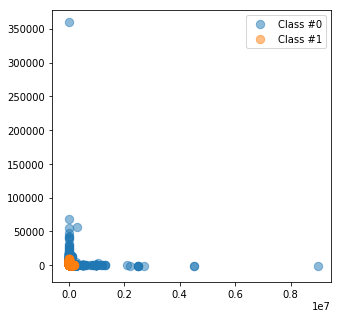

Random Forest  0.3 Media:  0.3 Tamaño:  137931 k:  5
Accuracy:  0.992
F1_Score :  0.147
F_BETA-SCORE:  0.115
Decision Tree  0.3 Media:  0.3 Tamaño:  137931 k:  5
Accuracy:  0.987
F1_Score :  0.12
F_BETA-SCORE:  0.15
Logistic  0.3 Media:  0.3 Tamaño:  137931 k:  5
Accuracy:  0.994
F1_Score :  0.0
F_BETA-SCORE:  0.0


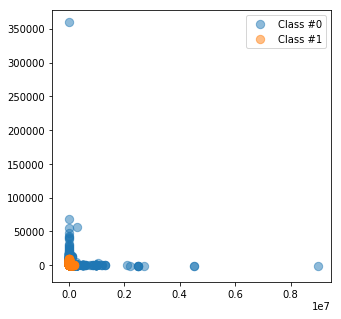

Random Forest  0.3 Media:  0.3 Tamaño:  137931 k:  15
Accuracy:  0.993
F1_Score :  0.161
F_BETA-SCORE:  0.119
Decision Tree  0.3 Media:  0.3 Tamaño:  137931 k:  15
Accuracy:  0.984
F1_Score :  0.1
F_BETA-SCORE:  0.153
Logistic  0.3 Media:  0.3 Tamaño:  137931 k:  15
Accuracy:  0.981
F1_Score :  0.015
F_BETA-SCORE:  0.024


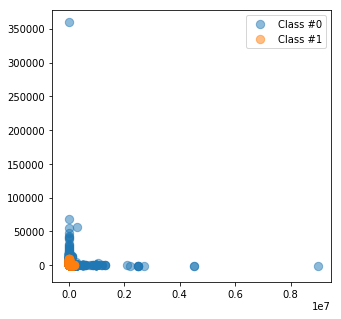

Random Forest  0.4 Media:  0.4 Tamaño:  160920 k:  5
Accuracy:  0.991
F1_Score :  0.13
F_BETA-SCORE:  0.111
Decision Tree  0.4 Media:  0.4 Tamaño:  160920 k:  5
Accuracy:  0.984
F1_Score :  0.09
F_BETA-SCORE:  0.141
Logistic  0.4 Media:  0.4 Tamaño:  160920 k:  5
Accuracy:  0.496
F1_Score :  0.013
F_BETA-SCORE:  0.315


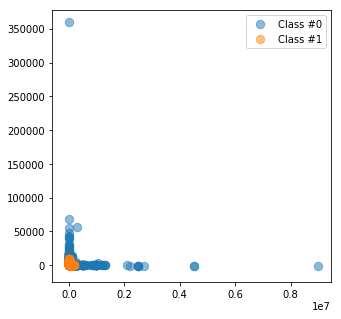

Random Forest  0.4 Media:  0.4 Tamaño:  160920 k:  15
Accuracy:  0.992
F1_Score :  0.182
F_BETA-SCORE:  0.143
Decision Tree  0.4 Media:  0.4 Tamaño:  160920 k:  15
Accuracy:  0.982
F1_Score :  0.09
F_BETA-SCORE:  0.157
Logistic  0.4 Media:  0.4 Tamaño:  160920 k:  15
Accuracy:  0.366
F1_Score :  0.017
F_BETA-SCORE:  0.439


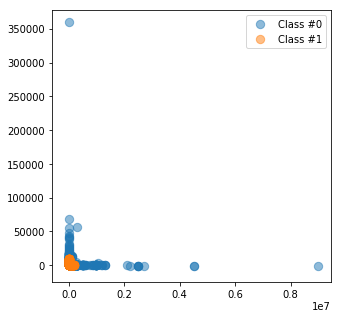

Random Forest  0.5 Media:  0.5 Tamaño:  193104 k:  5
Accuracy:  0.991
F1_Score :  0.118
F_BETA-SCORE:  0.102
Decision Tree  0.5 Media:  0.5 Tamaño:  193104 k:  5
Accuracy:  0.98
F1_Score :  0.08
F_BETA-SCORE:  0.133
Logistic  0.5 Media:  0.5 Tamaño:  193104 k:  5
Accuracy:  0.329
F1_Score :  0.016
F_BETA-SCORE:  0.438


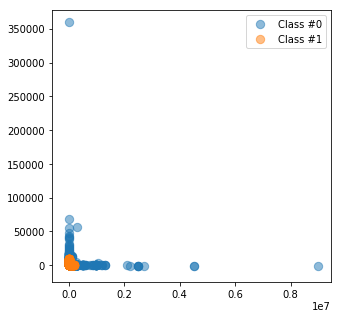

Random Forest  0.5 Media:  0.5 Tamaño:  193104 k:  15
Accuracy:  0.991
F1_Score :  0.158
F_BETA-SCORE:  0.151
Decision Tree  0.5 Media:  0.5 Tamaño:  193104 k:  15
Accuracy:  0.978
F1_Score :  0.09
F_BETA-SCORE:  0.18
Logistic  0.5 Media:  0.5 Tamaño:  193104 k:  15
Accuracy:  0.306
F1_Score :  0.016
F_BETA-SCORE:  0.435


In [201]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train, y_train, target_percentage, k, seed=3)
        X_u_a, y_u_a = SMOTE_(X_train_a, y_train, target_percentage, k, seed=3)
        plot_two_classes(X_u_a, y_u_a, size=(5, 5))
        plt.show()    
        rfc = RandomForestClassifier(n_estimators=300,max_features=15 , random_state=1, n_jobs=-1)
        treeclf = DecisionTreeClassifier(max_depth=19, random_state=1)
        logreg = LogisticRegression(solver='sag',max_iter =150) #cambio en parametros para lograr convergencia.
        treeclf.fit(X_u, y_u)
        rfc.fit(X_u, y_u)
        logreg.fit(X_u, y_u)
        y_pred=rfc.predict(X_test)
        y_pred_a = treeclf.predict(X_test)
        y_pred_b = logreg.predict(X_test)
        salid.append(['SMOTE','Random Forest',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred),3)])
        salid.append(['SMOTE','Random Forest',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred),3)])
        salid.append(['SMOTE','Random Forest',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred),3)])
        salid.append(['SMOTE','DecisionTree',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred_a),3)])
        salid.append(['SMOTE','DecisionTree',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred_a),3)])
        salid.append(['SMOTE','DecisionTree',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_a),3)])
        salid.append(['SMOTE','Logistic',target_percentage,'Accuracy',round(metrics.accuracy_score(y_test, y_pred_b),3)])
        salid.append(['SMOTE','Logistic',target_percentage,'F1_Score',round(metrics.accuracy_score(y_test, y_pred_b),3)])
        salid.append(['SMOTE','Logistic',target_percentage,'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_b),3)])
        print('Random Forest ',target_percentage, 'Media: ',round(y_u.mean(),2), 'Tamaño: ',y_u.shape[0], 'k: ',k)
        print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred),3)) #ACCURACY
        print('F1_Score : ',round(metrics.f1_score(y_test, y_pred),3)) #F1-SCORE
        print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred, beta=10),3)) #F_BETA-SCORE
        print('Decision Tree ',target_percentage,'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0], 'k: ',k)
        print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_a),3)) #ACCURACY
        print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_a),2)) #F1-SCORE
        print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_a, beta=10),3)) #F_BETA-SCORE
        print('Logistic ',target_percentage, 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0], 'k: ',k)
        print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_b),3)) #ACCURACY
        print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_b),3)) #F1-SCORE
        print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_b, beta=10),3)) #F_BETA-SCORE

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

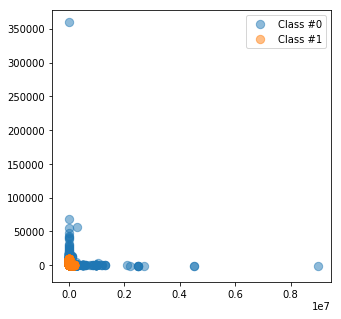

Random Forest  Media:  0.5 Tamaño:  192927
Accuracy:  0.991
F1_Score :  0.13
F_BETA-SCORE:  0.119
Decision Tree  Media:  0.5 Tamaño:  192927
Accuracy:  0.967
F1_Score :  0.07
F_BETA-SCORE:  0.208
Logistic  Media:  0.5 Tamaño:  192927
Accuracy:  0.333
F1_Score :  0.016
F_BETA-SCORE:  0.437


In [202]:
ada = ADASYN(random_state=42)
X_u, y_u = ada.fit_resample(X_train, y_train)
X_u_a, y_u_a = ada.fit_resample(X_train_a, y_train)
plot_two_classes(X_res, y_res, size=(5, 5))
plt.show()  
rfc = RandomForestClassifier(n_estimators=300,max_features=15 , random_state=1, n_jobs=-1)
treeclf = DecisionTreeClassifier(max_depth=19, random_state=1)
logreg = LogisticRegression(solver='sag',max_iter =150) #cambio en parametros para lograr convergencia.
treeclf.fit(X_u, y_u)
rfc.fit(X_u, y_u)
logreg.fit(X_u, y_u)
y_pred=rfc.predict(X_test)
y_pred_a = treeclf.predict(X_test)
y_pred_b = logreg.predict(X_test)
salid.append(['ADASYN','Random Forest',round(y_u.mean(),2),'Accuracy',round(metrics.accuracy_score(y_test, y_pred),3)])
salid.append(['ADASYN','Random Forest',round(y_u.mean(),2),'F1_Score',round(metrics.accuracy_score(y_test, y_pred),3)])
salid.append(['ADASYN','Random Forest',round(y_u.mean(),2),'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred),3)])
salid.append(['ADASYN','DecisionTree',round(y_u.mean(),2),'Accuracy',round(metrics.accuracy_score(y_test, y_pred_a),3)])
salid.append(['ADASYN','DecisionTree',round(y_u.mean(),2),'F1_Score',round(metrics.accuracy_score(y_test, y_pred_a),3)])
salid.append(['ADASYN','DecisionTree',round(y_u.mean(),2),'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_a),3)])
salid.append(['ADASYN','Logistic',round(y_u.mean(),2),'Accuracy',round(metrics.accuracy_score(y_test, y_pred_b),3)])
salid.append(['ADASYN','Logistic',round(y_u.mean(),2),'F1_Score',round(metrics.accuracy_score(y_test, y_pred_b),3)])
salid.append(['ADASYN','Logistic',round(y_u.mean(),2),'F_BETA_SCORE',round(metrics.accuracy_score(y_test, y_pred_b),3)])
print('Random Forest ', 'Media: ',round(y_u.mean(),2), 'Tamaño: ',y_u.shape[0])
print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred),3)) #ACCURACY
print('F1_Score : ',round(metrics.f1_score(y_test, y_pred),3)) #F1-SCORE
print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred, beta=10),3)) #F_BETA-SCORE
print('Decision Tree ','Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_a),3)) #ACCURACY
print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_a),2)) #F1-SCORE
print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_a, beta=10),3)) #F_BETA-SCORE
print('Logistic ', 'Media: ',round(y_u.mean(),3), 'Tamaño: ',y_u.shape[0])
print('Accuracy: ',round(metrics.accuracy_score(y_test, y_pred_b),3)) #ACCURACY
print('F1_Score : ',round(metrics.f1_score(y_test, y_pred_b),3)) #F1-SCORE
print('F_BETA-SCORE: ',round(metrics.fbeta_score(y_test, y_pred_b, beta=10),3)) #F_BETA-SCORE

# Exercise 15.6 (3 points)

Compare and comment about the results.


In [203]:
resultados=pd.DataFrame(salid,columns=['Tipo','Modelo','Porcentaje','Metrica','Valor'])
resultados.head()

,Tipo,Modelo,Porcentaje,Metrica,Valor
0,UnderSampling,Random Forest,0.1,Accuracy,0.982
1,UnderSampling,Random Forest,0.1,F1_Score,0.982
2,UnderSampling,Random Forest,0.1,F_BETA_SCORE,0.982
3,UnderSampling,DecisionTree,0.1,Accuracy,0.936
4,UnderSampling,DecisionTree,0.1,F1_Score,0.936


In [204]:
table = pd.pivot_table(resultados, values='Valor', index=['Tipo','Modelo','Porcentaje'], columns=['Metrica'], aggfunc=np.mean)
table

Metrica                                 Accuracy  F1_Score  F_BETA_SCORE
Tipo          Modelo        Porcentaje                                  
ADASYN        DecisionTree  0.5           0.9670    0.9670        0.9670
              Logistic      0.5           0.3330    0.3330        0.3330
              Random Forest 0.5           0.9910    0.9910        0.9910
OverSampling  DecisionTree  0.1           0.9860    0.9860        0.9860
                            0.2           0.9820    0.9820        0.9820
                            0.3           0.9670    0.9670        0.9670
                            0.4           0.9700    0.9700        0.9700
                            0.5           0.9470    0.9470        0.9470
              Logistic      0.1           0.9940    0.9940        0.9940
                            0.2           0.9940    0.9940        0.9940
                            0.3           0.9800    0.9800        0.9800
                            0.4           0.3900    0.3900        0.3900
                            0.5           0.3240    0.3240        0.3240
              Random Forest 0.1           0.9930    0.9930        0.9930
                            0.2           0.9930    0.9930        0.9930
                            0.3           0.9930    0.9930        0.9930
                            0.4           0.9930    0.9930        0.9930
                            0.5           0.9920    0.9920        0.9920
SMOTE         DecisionTree  0.1           0.9880    0.9880        0.9880
                            0.2           0.9860    0.9860        0.9860
                            0.3           0.9855    0.9855        0.9855
                            0.4           0.9830    0.9830        0.9830
                            0.5           0.9790    0.9790        0.9790
              Logistic      0.1           0.9940    0.9940        0.9940
                            0.2           0.9940    0.9940        0.9940
                            0.3           0.9875    0.9875        0.9875
                            0.4           0.4310    0.4310        0.4310
                            0.5           0.3175    0.3175        0.3175
              Random Forest 0.1           0.9930    0.9930        0.9930
                            0.2           0.9930    0.9930        0.9930
                            0.3           0.9925    0.9925        0.9925
                            0.4           0.9915    0.9915        0.9915
                            0.5           0.9910    0.9910        0.9910
UnderSampling DecisionTree  0.1           0.9360    0.9360        0.9360
                            0.2           0.8750    0.8750        0.8750
                            0.3           0.8160    0.8160        0.8160
                            0.4           0.7530    0.7530        0.7530
                            0.5           0.6710    0.6710        0.6710
              Logistic      0.1           0.9940    0.9940        0.9940
                            0.2           0.9940    0.9940        0.9940
                            0.3           0.9640    0.9640        0.9640
                            0.4           0.3700    0.3700        0.3700
                            0.5           0.3200    0.3200        0.3200
              Random Forest 0.1           0.9820    0.9820        0.9820
                            0.2           0.9500    0.9500        0.9500
                            0.3           0.8900    0.8900        0.8900
                            0.4           0.8270    0.8270        0.8270
                            0.5           0.7560    0.7560        0.7560